<a href="https://colab.research.google.com/github/BrendaChepkoech/WEEK-9-PROJECT/blob/main/NOTEBOOK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predict whether an e-mail is spam (1) or not (0)

### b) Defining the Metric for Success

To be able to create a model using the Naive Bayes Classifier that can predict whether an email is spam or not.

### c) Understanding the context 

Our dataset contains very many numerical columns and the target column has been named as '1'. The target variable has two classes which are;

1 - email is spam

0 - email is not spam.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [30]:
# Load libraries and datasets to be used in this example
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the Data from the source i.e. csv
# ---
df=pd.read_csv("/content/spambase.data",header=None)
df.columns=["A","A1","A2","A3","B","B1","B2","B3","B4","C","C1","C2","C3","D","D1","D2","D3","E","E1","E2","E3","E4","E5","F","F1","F2","F3",'F4',"F5","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","X1","X2","X3","X4","Y","Z","Z1","Z1","Z1","Z1","Target"]
df.head(4)

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [5]:
df_desc=pd.read_csv("/content/spambase.DOCUMENTATION",error_bad_lines=False,sep=',', delimiter =":", header=None)
df_desc

b'Skipping line 80: expected 2 fields, saw 6\n'


,0,1
0,1. Title,SPAM E-mail Database
1,2. Sources,NaN
2,(a) Creators,"Mark Hopkins, Erik Reeber, George Forman, Jaa..."
3,"Hewlett-Packard Labs, 1501 Page Mill R...",NaN
4,(b) Donor,George Forman (gforman at nospam hpl.hp.com) ...
...,...,...
116,56 1 9989 52.173 194.89 374,NaN
117,57 1 15841 283.29 606.35 214,NaN
118,58 0 1 0.39404 0.4887 124,NaN
119,This file,'spambase.DOCUMENTATION' at the UCI Machine L...




## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
#
df.shape

(4601, 58)

In [7]:
# Previewing the top of our dataset
#
df.head(5)

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
# Checking the number of unique classes in each column
# This helps in knowing whether a column is categorical, numerical or is an object
df.nunique()

A          142
A1         171
A2         214
A3          43
B          255
B1         141
B2         173
B3         170
B4         144
C          245
C1         113
C2         316
C3         158
D          133
D1         118
D2         253
D3         197
E          229
E1         575
E2         148
E3         401
E4          99
E5         164
F          143
F1         395
F2         281
F3         240
F4         200
F5         156
G          179
H          128
I          106
J          184
K          110
L          177
M          159
N          188
O           53
P          163
Q          125
R          108
S          186
T          136
U          160
V          230
W          227
X           38
X1         106
X2         313
X3         641
X4         225
Y          964
Z          504
Z1         316
Z1        2161
Z1         271
Z1         919
Target       2
dtype: int64

In [10]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

A         float64
A1        float64
A2        float64
A3        float64
B         float64
B1        float64
B2        float64
B3        float64
B4        float64
C         float64
C1        float64
C2        float64
C3        float64
D         float64
D1        float64
D2        float64
D3        float64
E         float64
E1        float64
E2        float64
E3        float64
E4        float64
E5        float64
F         float64
F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
G         float64
H         float64
I         float64
J         float64
K         float64
L         float64
M         float64
N         float64
O         float64
P         float64
Q         float64
R         float64
S         float64
T         float64
U         float64
V         float64
W         float64
X         float64
X1        float64
X2        float64
X3        float64
X4        float64
Y         float64
Z         float64
Z1        float64
Z1        float64
Z1        

In [11]:
# We can check for the unique values in the 'class' column
print(df['Target'].unique())

[1 0]


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


### a.Validation

## 5. Tidying the Dataset

In [24]:
# Checking for Outliers
#
# Checking for outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
new_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_df.shape)

# Printing the shape of our old dataset
print(df.shape)


(177, 58)
(4601, 58)


Removing the outliers from our dataset would completely make the dataset lose meaning as most records will be dropped. Due to this, we opt not to remove the outliers and instead work on the dataset with the outliers present.

In [13]:
# Checking for Anomalies
#

In [14]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

0

In [15]:
# More data cleaning procedures
#
df.duplicated().sum()

391

In [21]:
df.drop_duplicates()

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## 6. Exploratory Analysis

In [26]:
#Frequency table for the target column
# We can check for the frequency distribution in our dataset
df['Target'].value_counts()

0    2788
1    1813
Name: Target, dtype: int64

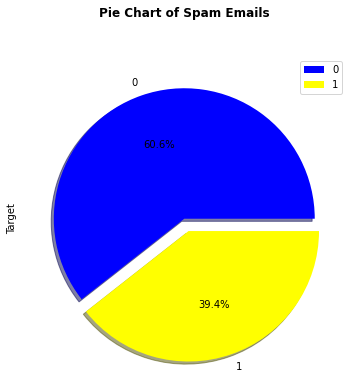

In [31]:
# Pie chart of the gender distribution
df['Target'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=["blue","yellow"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Spam Emails', y=1.1,weight="bold")
plt.show()

In [33]:
#Data description
df.describe()

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.0

In [35]:
# Checking for independence between features¶
# Correlation
df.corr()

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1,Target
A,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
A1,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
A2,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
A3,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
B,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
B1,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.059329,-0.084402,-0.087271,-0.069051,-0.066223,-0.048673,-0.048127,-0.046383,-0.036835,-0.034164,-0.037315,-0.054315,-0.052819,-0.057465,-0.017918,-0.047619,-0.029866,-0.029457,-0.054812,-0.030616,-0.028826,-0.053637,-0.033046,-0.014343,-0.031693,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
B2,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,0.159578,-0.001461,0.013295,-0.022723,0.042904,0.128436,0.187981,0.122011,0.111792,0.046134,0.130794,-0.002093,0.064795,0.030575,-0.089494,-0.080330,-0.065893,-0.066947,-0.048482,-0.058101,-0.046280,-0.040538,-0.041372,-0.040910,-0.053202,-0.053978,-0.052035,-0.014781,-0.046978,-0.022121,-0.033120,-0.049664,-0.049079,-0.034461,-0.050811,-0.056166,-0.017512,-0.031408,-0.033089,-0.051885,-0.027653,0.05

## 7. Implementing the Solution

### a)80-20 Train Test split

In [36]:
#splitting data into target and features
X=df.drop(["Target"],1)
y=df[["Target"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  69.92399565689468


### b) 70-30 Train and Test Set Split

In [39]:
#splitting data into target and features
X=df.drop(["Target"],1)
y=df[["Target"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [40]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  70.38377986965966


### c)60-40 train and test split

In [42]:
#splitting data into target and features
X=df.drop(["Target"],1)
y=df[["Target"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [43]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  70.61379684953829


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## a) Gaussian Naive Bayes Classifier

Gaussian Naive Bayes Classifier asumes that the distribution of features is gaussian. We shall test this using the shapiro test.

In [45]:
# Using the Shapiro-Wiks function to test for normality

# Imporing the shapiro function
from scipy.stats import shapiro 

# Testing for normality
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the p-value while comparing with the alpha
# to determine if the data is Gaussian
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian')
else:
	print('Data does not look Gaussian')

Statistics=0.037, p=0.000
Data does not look Gaussian


In [50]:
#splitting data into target and features
X=df.drop(["Target"],1)
y=df[["Target"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.naive_bayes import GaussianNB

# Introduce the Gaussian object and fit the train set 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [57]:
# Making predictions using our MultinomialNB classifier
y_pred = model.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[520  18]
 [187 196]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       538
           1       0.92      0.51      0.66       383

    accuracy                           0.78       921
   macro avg       0.83      0.74      0.75       921
weighted avg       0.81      0.78      0.76       921



Our features are not normally distributed but we shall assess the performance of our Gaussian Naive Bayes classifier on our dataset just for comparison purposes.

In [58]:
#Checking multicollinearity
# Pick independent variables only.
independent=df.drop(columns=["Target"])

# Let's display the correlations between the variables
correlations=independent.corr()
# Checking for multicollinearity using the VIF 
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,A,A1,A2,A3,B,B1,B2,B3,B4,C,C1,C2,C3,D,D1,D2,D3,E,E1,E2,E3,E4,E5,F,F1,F2,F3,F4,F5,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,X1,X2,X3,X4,Y,Z,Z1,Z1,Z1,Z1
A,1.135153,0.012350,-0.003005,-0.011262,0.019017,-0.010584,0.056967,0.067177,-0.049812,0.011000,-0.147383,-0.080526,-0.019708,-0.004347,0.050059,-0.020360,-0.032932,-0.014943,-0.024204,0.039415,-0.113488,0.020591,-0.104968,-0.159214,0.016099,0.002550,0.024919,-0.000843,0.026043,0.014323,-0.001674,0.497421,0.015831,-0.580696,0.004708,0.023563,0.030963,0.000069,-0.017190,0.052675,-0.019840,-0.004041,-0.013928,0.004175,0.009231,0.011212,-0.000122,0.004829,0.006815,-0.012300,0.019723,-0.018004,-0.034538,0.004134,-0.035584,0.017688,-0.031946
A1,0.012350,1.034308,0.035450,0.014838,0.027797,0.027689,0.007607,0.024007,0.009444,-0.043468,-0.002407,0.040869,0.026032,0.006125,0.002169,0.018901,0.009151,-0.047766,0.091338,0.017722,0.019839,0.025579,0.017815,-0.010903,0.054712,0.026177,0.076168,0.012972,0.006283,0.019139,0.006651,-0.260265,0.036246,0.127292,0.013906,0.050449,0.018780,0.005460,0.006231,0.025134,0.008746,0.027087,-0.006193,0.031777,0.018018,0.040783,0.012268,0.022013,0.003940,0.085882,0.022466,0.013535,-0.002269,-0.005881,0.020770,-0.062032,0.042594
A2,-0.003005,0.035450,1.110868,0.025553,-0.025045,-0.029081,0.018319,0.026838,-0.030984,0.020052,0.029335,-0.055152,-0.006404,0.009230,-0.066318,-0.033517,0.024790,-0.068281,-0.073042,-0.000892,-0.093658,0.037268,-0.057363,0.018393,0.049853,0.001784,0.076732,0.008023,0.052268,-0.057110,-0.032204,-0.095813,0.037710,0.121415,0.017017,-0.023692,0.023023,-0.033580,-0.014925,0.040945,0.000292,-0.028603,0.013328,0.046181,0.042644,0.041779,-0.031549,0.016652,0.010199,-0.010206,0.014296,-0.072305,-0.006081,0.007517,-0.089127,-0.012638,-0.012719
A3,-0.011262,0.014838,0.025553,1.007701,-0.000716,0.018018,-0.017022,-0.009305,0.012870,0.005555,0.022808,0.019571,0.021511,-0.010165,0.005498,0.001048,0.000294,-0.019564,0.023535,0.011474,-0.005378,-0.029183,-0.009220,-0.034434,0.011956,0.005976,0.018704,0.002409,-0.002053,0.001831,0.002571,-0.033283,0.009278,0.013410,0.000067,0.001455,0.000180,0.001763,-0.004319,0.008475,0.001438,0.006994,0.004688,0.007117,0.010968,0.009974,0.003676,0.002012,0.014291,0.028890,0.006529,0.005109,-0.004871,0.008424,0.013313,-0.038843,-0.006344
B,0.019017,0.027797,-0.025045,-0.000716,1.120328,-0.019608,-0.104157,0.016928,0.036461,-0.008505,0.006160,-0.030493,-0.009181,-0.000783,-0.032217,-0.051898,-0.112734,-0.026989,-0.045829,0.010691,-0.074217,0.017576,-0.024232,0.042079,0.017067,0.039075,0.069237,0.016347,-0.014479,0.015306,0.023613,-0.152296,0.016175,0.052744,0.016418,0.013761,0.019610,-0.130431,0.017076,0.026061,0.006765,-0.120144,0.018476,-0.030431,0.027496,0.059977,0.029395,0.023478,0.009986,0.030219,0.005502,0.017516,0.007048,0.002538,-0.039619,-0.033918,0.028846
B1,-0.010584,0.027689,-0.029081,0.018018,-0.019608,1.099838,-0.021059,-0.044818,-0.054087,0.045362,0.015087,0.011433,-0.032913,0.010359,-0.093922,0.020304,-0.000187,-0.014927,-0.029474,-0.028741,-0.026019,-0.005784,-0.146258,-0.017472,0.026618,0.035386,0.042820,0.021292,0.003759,-0.016409,0.009055,-0.111890,0.014203,0.040811,0.016191,0.003932,0.011012,0.011750,0.022439,0.051169,0.010651,0.031678,-0.001009,0.014281,0.040241,0.013958,0.011670,0.017457,0.012810,-0.002789,0.001573,-0.030302,-0.006646,-0.014197,0.058553,-0.057151,0.004469
B2,0.056967,0.007607,0.018319,-0.017022,-0.104157,-0.021059,1.124583,0.028193,0.003753,-0.018912,-0.121315,0.036937,0.027750,0.027626,0.012687,-0.085832,-0.152859,-0.095326,-0.042362,0.017482,-0.008689,0.000918,-0.005308,0.008139,0.041989,0.007120,0.051468,0.021067,0.000609,0.030097,0.013463,-0.146212,0.018274,0.092951,0.006651,0.015485,-0.004918,0.022471,0.011809,-0.014679,-0.003498,0.037818,0.016822,0.026404,0.035503,0.042855,0.010958,0.017766,0.022408,0.043399,0.008721,-0.005829,-0.035611,-0.046618,-0.007216,-0.069518,0.078807
B3,0.067177,0.024007,0.026838,-0.009305,0.016928,-0.044818,0.028193,1.098624,-0.039047,-0.050903,-

The VIF score for each variable is found alongside the downwards sloping diagonal. We shall not drop any column since the VIF scores are small.
We shall not drop any column since the VIF scores are below 5 which means that our features are not correlated.

In [60]:
#splitting data into target and features
X=df.drop(["Target"],1)
y=df[["Target"]]

# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Normalizing our data

# Transform feature matrix
from sklearn.preprocessing import Normalizer

scaler= Normalizer(norm="l2")
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.naive_bayes import MultinomialNB

# Introduce the MultinumialNB object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions using our MultinomialNB classifier
y_pred1 = model.predict(X_test)

In [65]:
# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[531   0]
 [390   0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       531
           1       0.00      0.00      0.00       390

    accuracy                           0.58       921
   macro avg       0.29      0.50      0.37       921
weighted avg       0.33      0.58      0.42       921



## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?